# GPS PRN proccessing


In [1]:
%matplotlib inline
import numpy as np

## Creation of the signal

In [2]:
from blocksim.graphics.BFigure import FigureFactory
from blocksim.dsp.DSPSignal import DSPSignal
from blocksim.dsp import createGNSSSequence

y1 = createGNSSSequence(name="s1", modulation="L1CA", sv=1, repeat=1, chip_rate=1.023e6)
y = createGNSSSequence(name="s1", modulation="L1CA", sv=1, repeat=20, chip_rate=1.023e6)
y = y.applyGaussianNoise(pwr=200)

[02/07/23 15:28:20] INFO     Registered blocksim.loggers.CSVLogger                                   ]8;id=216344;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=558886;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#99\99]8;;\

                    INFO     Registered blocksim.loggers.PickleLogger                                ]8;id=870736;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=735258;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#99\99]8;;\

                    INFO     Registered blocksim.loggers.XlsLogger                                   ]8;id=519911;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=464407;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#99\99]8;;\

                    INFO     Registered blocksim.loggers.ParquetLogger                               ]8;id=849591;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py\__init__.py]8;;\:]8;id=556909;file:///home/yannbdt/repos/blocksim/blocksim/__init__.py#99\99]8;;\

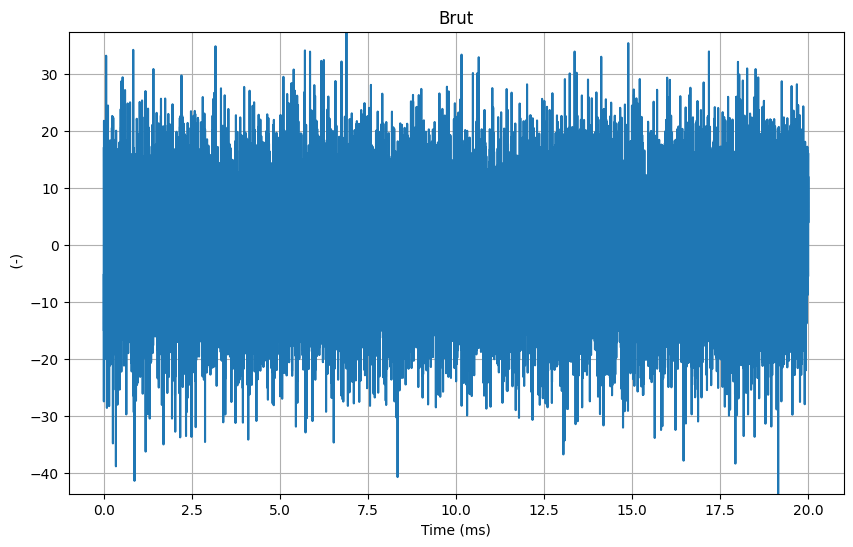

In [3]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Brut", spec=gs[0, 0])
axe.plot(y)
mfig = fig.render()

## Processing

### Correlation

In [4]:
# Correlation
z = y.correlate(y1)

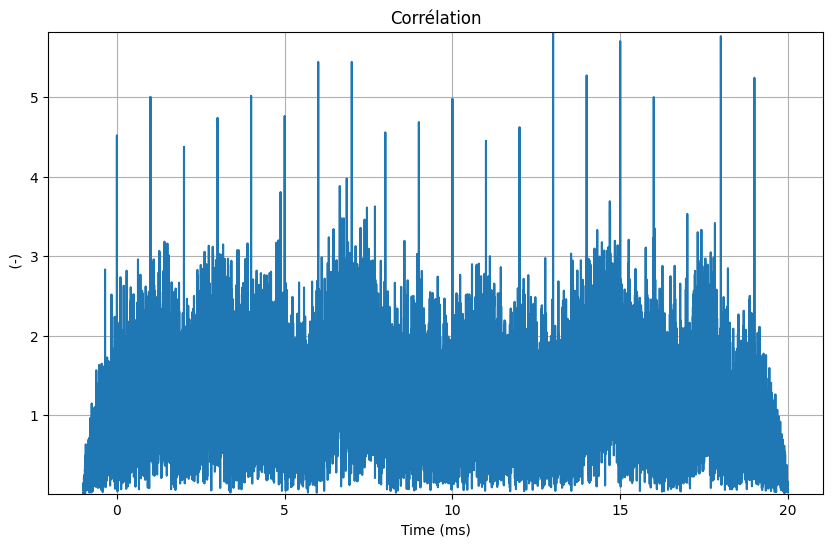

In [5]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Corrélation", spec=gs[0, 0])
axe.plot(z, transform=np.abs)
mfig = fig.render()

### Coherent Integration

In [6]:
# Integration
zi = z.integrate(period=1e-3, offset=511 / (1.023e6))

[02/07/23 15:28:22] INFO     Found peak : Peak(Time=-7.77 ns, value=13.8)                          ]8;id=552730;file:///home/yannbdt/repos/blocksim/blocksim/graphics/Plottable.py\Plottable.py]8;;\:]8;id=317508;file:///home/yannbdt/repos/blocksim/blocksim/graphics/Plottable.py#135\135]8;;\

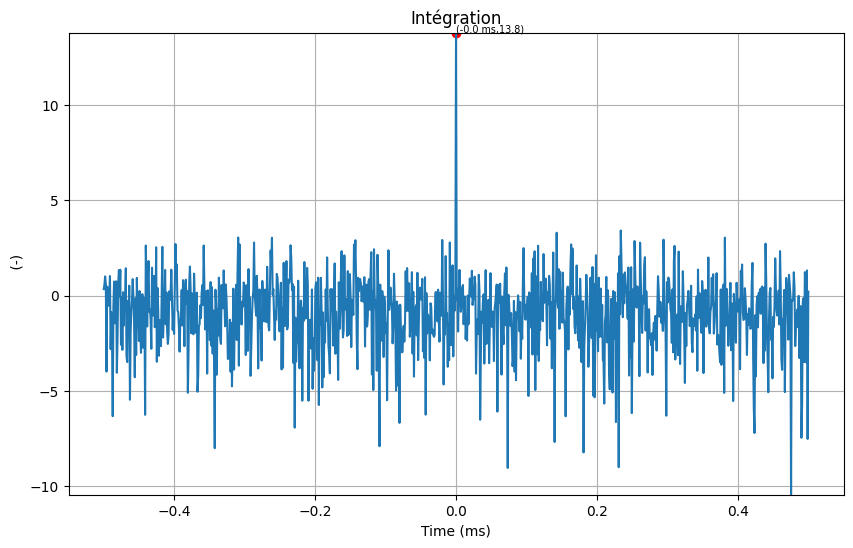

In [7]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Intégration", spec=gs[0, 0])
axe.plot(zi, find_peaks=1)
mfig = fig.render()